In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset/cluster_data.csv")
df

,NEIGHBOURHOOD,Theft of Vehicle,Theft of Bicycle
0,Arbutus Ridge,498.0,160.0
1,Dunbar-Southlands,629.0,240.0
2,Fairview,2037.0,3394.0
3,Grandview-Woodland,3111.0,1403.0
4,Hastings-Sunrise,2452.0,321.0
5,Kensington-Cedar Cottage,2919.0,859.0
6,Kerrisdale,547.0,179.0
7,Killarney,1302.0,163.0
8,Kitsilano,2366.0,2464.0
9,Marpole,1617.0,232.0


In [3]:
data = df.iloc[:, 1:3]
data

,Theft of Vehicle,Theft of Bicycle
0,498.0,160.0
1,629.0,240.0
2,2037.0,3394.0
3,3111.0,1403.0
4,2452.0,321.0
5,2919.0,859.0
6,547.0,179.0
7,1302.0,163.0
8,2366.0,2464.0
9,1617.0,232.0


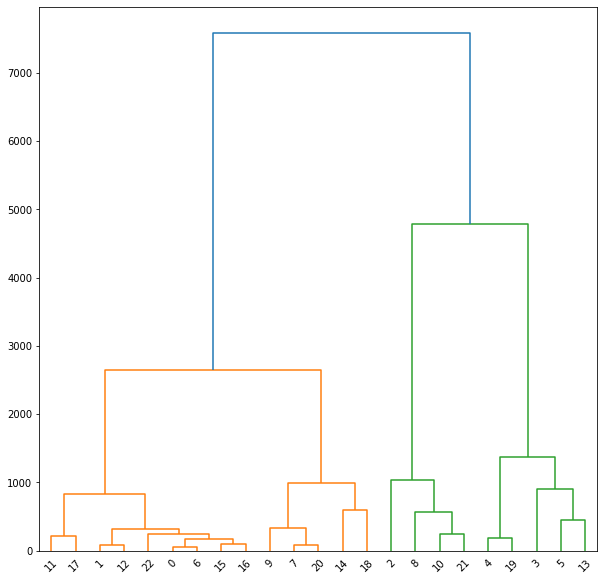

In [7]:
plt.figure(figsize=(10, 10))
clusters = shc.linkage(data, method='ward')
shc.dendrogram(Z=clusters)
plt.show()

In [8]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(data)

AgglomerativeClustering(n_clusters=3)

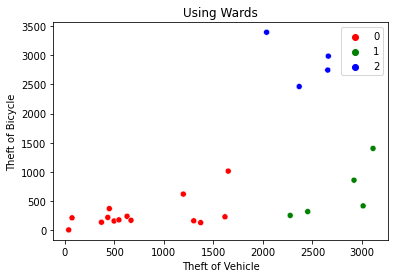

In [13]:
data_labels = clustering_model.labels_
sns.scatterplot(
    x="Theft of Vehicle",
    y="Theft of Bicycle", 
    data=data,
    hue=data_labels,
    palette=["red", "green", "blue"]
).set_title("Using Wards")
plt.show()

In [11]:
clustering_model_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
clustering_model_complete.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

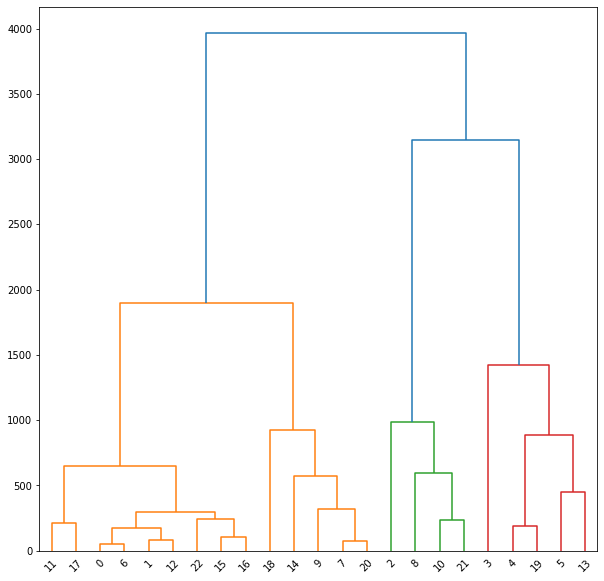

In [7]:
plt.figure(figsize=(10, 10))
clusters = shc.linkage(data, method='complete')
shc.dendrogram(Z=clusters)
plt.show()

[498. 160.]: 0
[629. 240.]: 0
[2037. 3394.]: 2
[3111. 1403.]: 1
[2452.  321.]: 1
[2919.  859.]: 1
[547. 179.]: 0
[1302.  163.]: 0
[2366. 2464.]: 2
[1617.  232.]: 0
[2654. 2746.]: 2
[40.  7.]: 0
[669. 172.]: 0
[3011.  419.]: 1
[1197.  621.]: 0
[371. 139.]: 0
[435. 221.]: 0
[ 74. 214.]: 0
[1650. 1015.]: 0
[2275.  255.]: 1
[1372.  132.]: 0
[2660. 2985.]: 2
[450. 372.]: 0


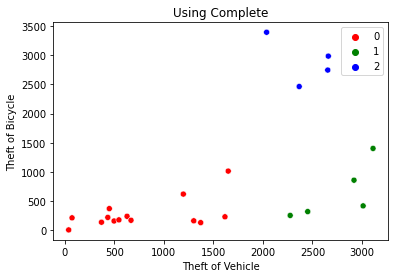

In [20]:
data_labels = clustering_model_complete.labels_
for i in range(len(data_labels)):
    print(f"{ data.values[i] }: { data_labels[i] }")
# print(data_labels)
# print(data.values)
sns.scatterplot(
    x="Theft of Vehicle",
    y="Theft of Bicycle", 
    data=data,
    hue=data_labels,
    palette=["red", "green", "blue"]
).set_title("Using Complete")
plt.show()

In [4]:
clustering_model_single = AgglomerativeClustering(n_clusters=3, linkage="single")
clustering_model_single.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

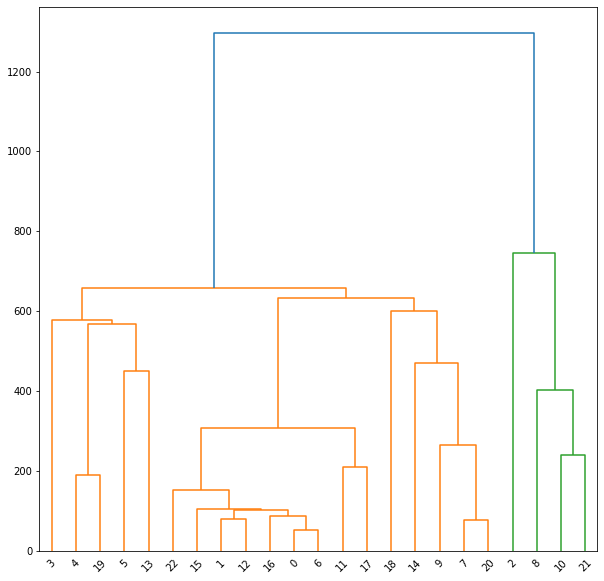

In [8]:
plt.figure(figsize=(10, 10))
clusters = shc.linkage(data, method='single')
shc.dendrogram(Z=clusters)
plt.show()

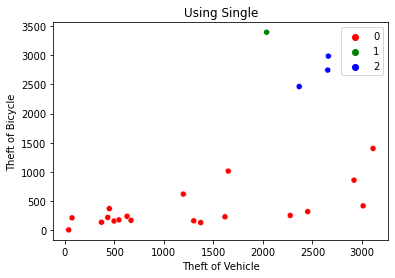

In [5]:
data_labels = clustering_model_single.labels_
sns.scatterplot(
    x="Theft of Vehicle",
    y="Theft of Bicycle", 
    data=data,
    hue=data_labels,
    palette=["red", "green", "blue"]
).set_title("Using Single")
plt.show()

In [27]:
clustering_model_average = AgglomerativeClustering(n_clusters=3, linkage="average")
clustering_model_average.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

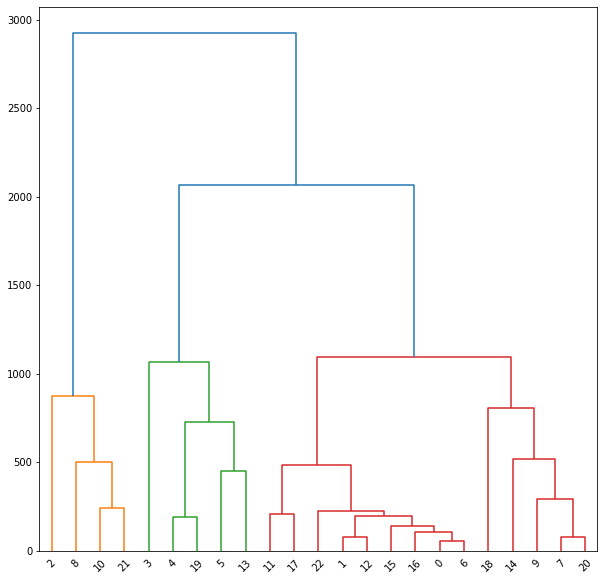

In [9]:
plt.figure(figsize=(10, 10))
clusters = shc.linkage(data, method='average')
shc.dendrogram(Z=clusters)
plt.show()

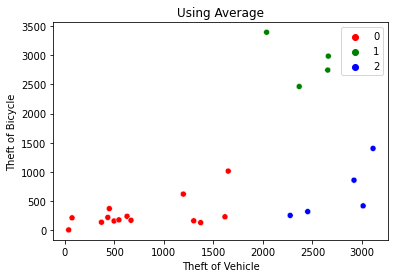

In [28]:
data_labels = clustering_model_average.labels_
sns.scatterplot(
    x="Theft of Vehicle",
    y="Theft of Bicycle", 
    data=data,
    hue=data_labels,
    palette=["red", "green", "blue"]
).set_title("Using Average")
plt.show()